# Градиентный спуск (часть 1)

**Задание 1.**

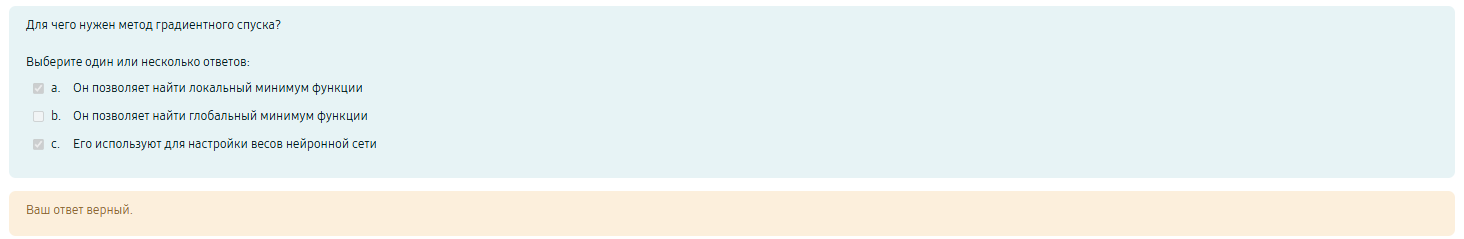

**Задание 2.**

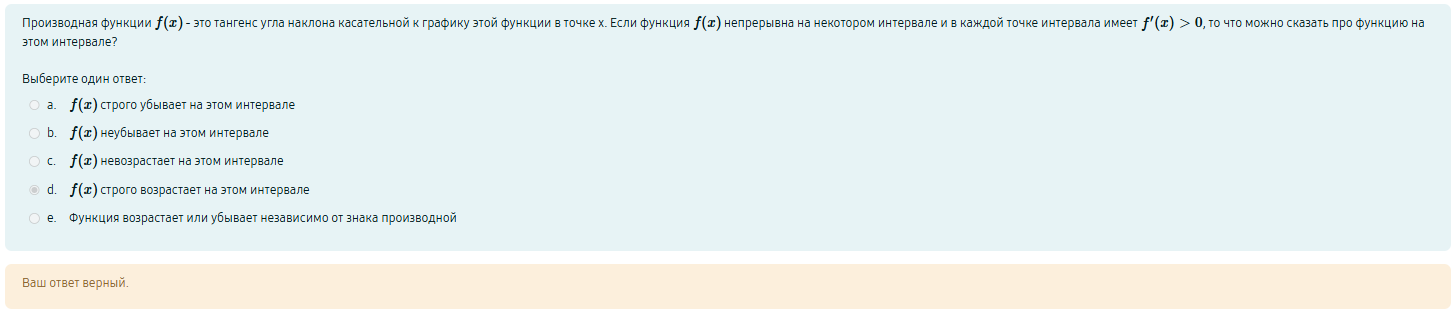

**Задание 3.**

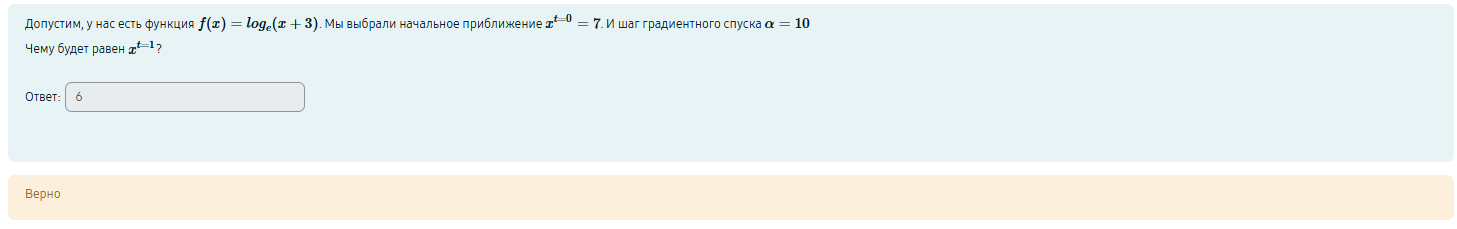

**Задание 4.**

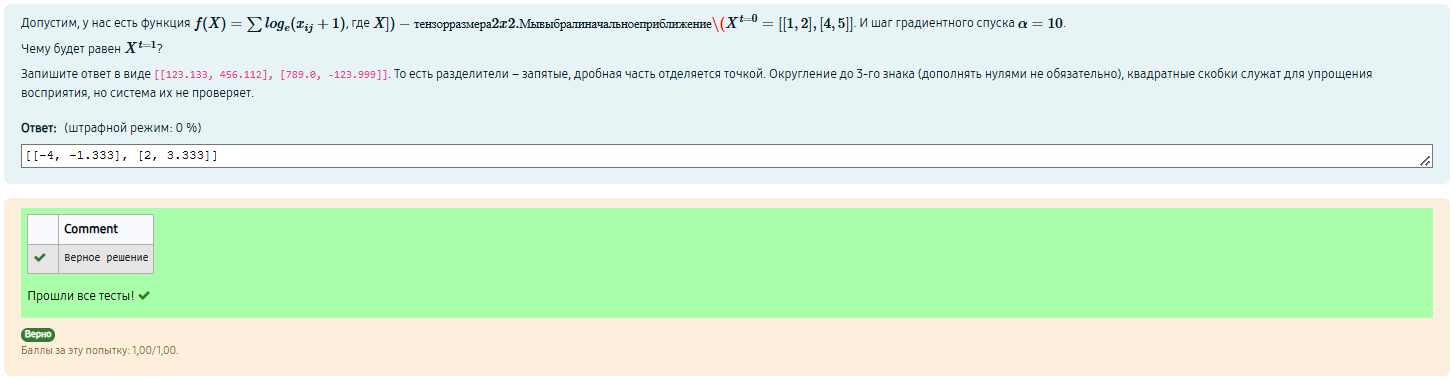

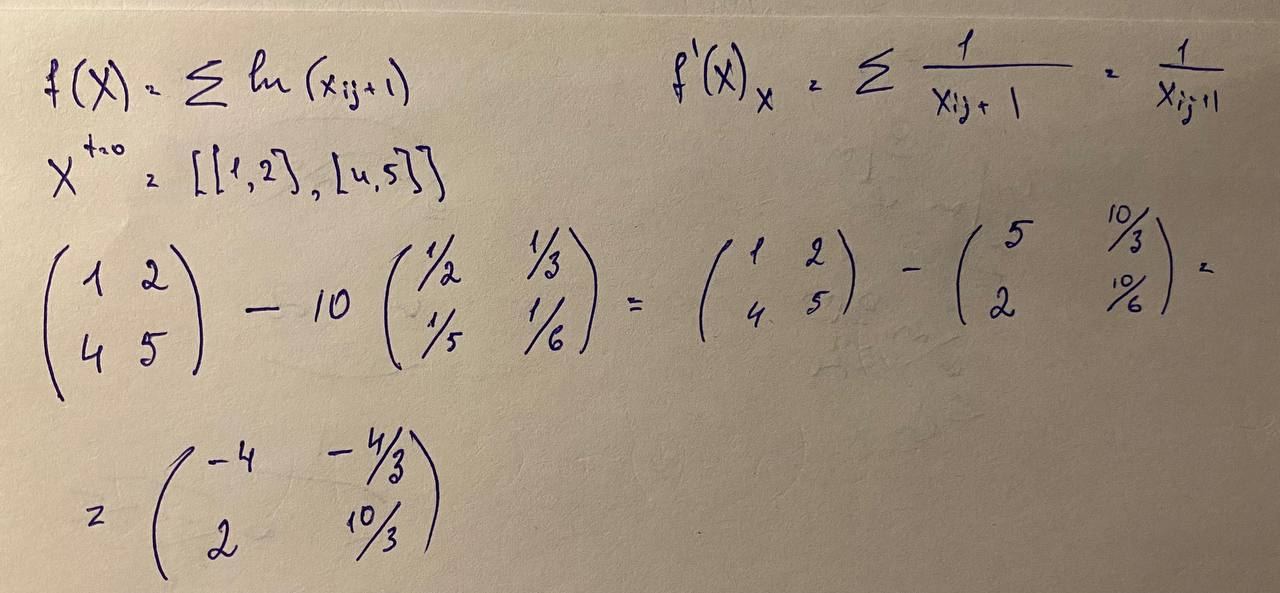

**Задание 5.**

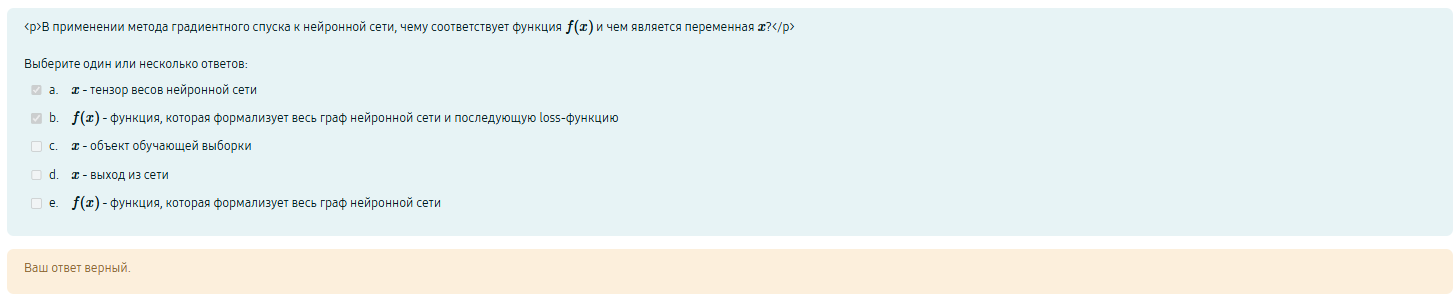

# Реализация градиентного спуска (часть 2)

$$ f(x) \longrightarrow  \displaystyle \min_{x} $$

$$ x^{t+1} = x^t-\alpha{f'(x^t)} $$

$$ f(x^{t+1}) = f(x^t-\alpha{f'(x^t)}) $$

$$ f(\textbf{X}) = 10\cdot\sum\limits_{i, j}x_{ij}^2 $$

$$ f'(\textbf{X})_{\textbf{X}} = ? $$

$$ f'(\textbf{X})_{x_{kl}} = \Big( 10\cdot\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' = 10 \cdot\Big(\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' \quad = 10 \cdot\sum\limits_{i, j}\Big(x_{ij}^2\Big)_{x_{kl}}' \quad = 10 \cdot\sum\limits_{i, j}2 x_{ij} \big(x_{ij}\big)_{x_{kl}}' \quad = 10 \cdot 2 x_{kl} \cdot 1 = 20 x_{kl} $$

$$ f(\textbf{X}) = 10\cdot\sum\limits_{i, j}x_{ij}^2 $$

$$ f'(\textbf{X})_{\textbf{X}} = 20 \textbf{X} $$

In [2]:
import torch

x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)

function = 10 * (x ** 2).sum()

function.backward()

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


**Задание 1.**

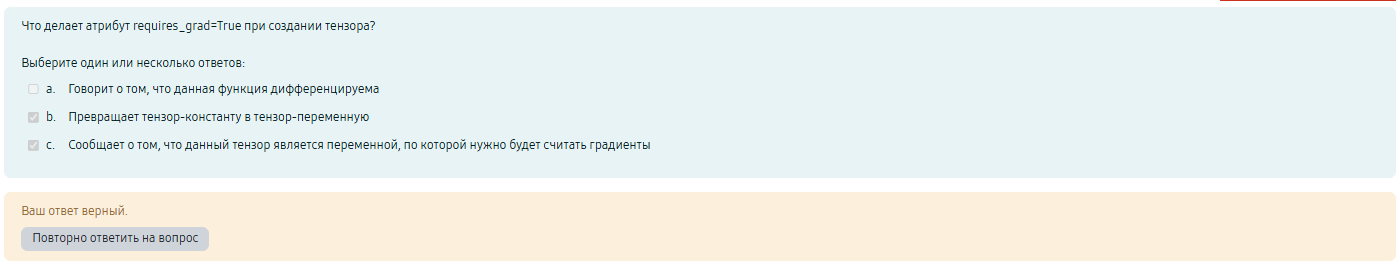

In [3]:
print(function.grad_fn) # последняя функция, которая привела к конечному результату (делали умножение)
print(function.grad_fn.next_functions[0][0]) # пред-последнее было суммирование
print(function.grad_fn.next_functions[0][0].next_functions[0][0]) # вычисление квадрата
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]) # посчитать весь градиент

**Задание 2.**

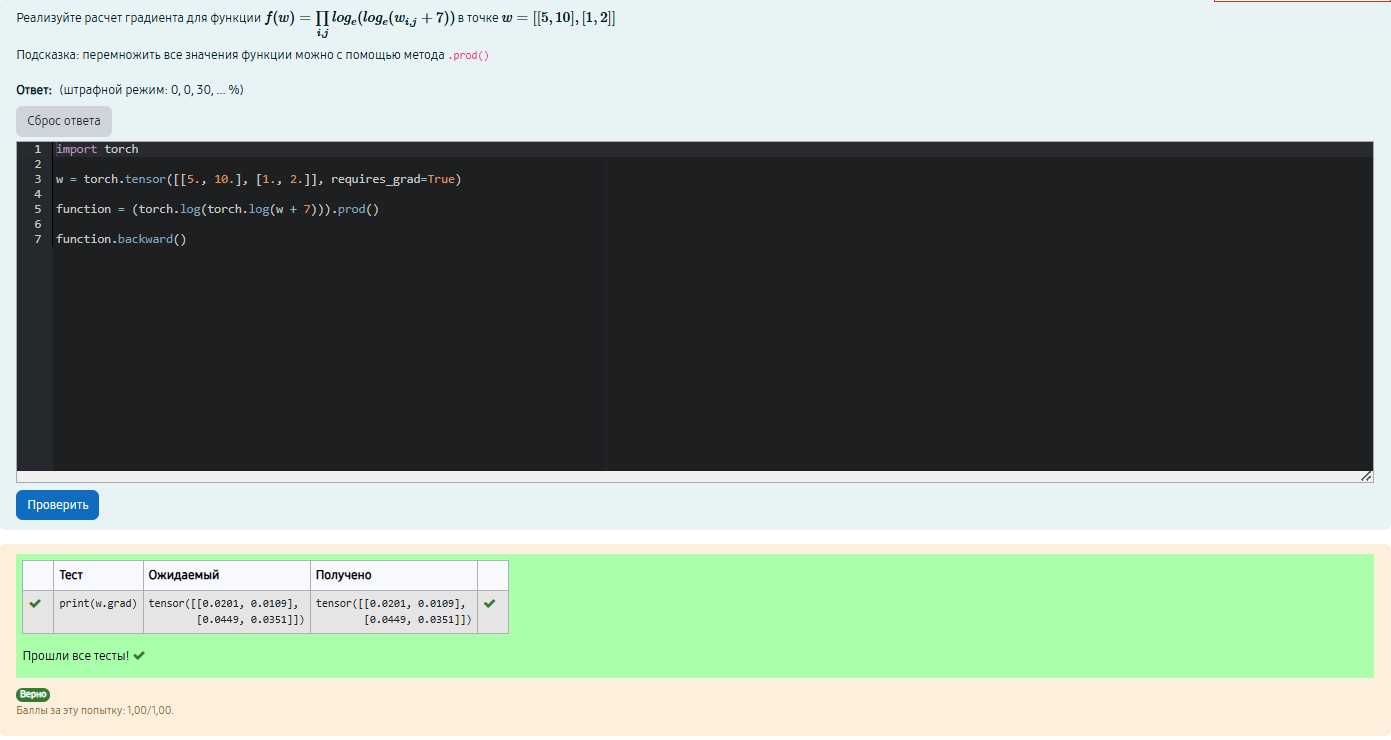

In [8]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)

function = (torch.log(torch.log(w + 7))).prod()

function.backward()

print(w.grad, '<- gradient')

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]]) <- gradient


In [3]:
x.data -= 0.001 * x.grad

Почему тут написано "x.data", а не просто "x"? Дело в том, что если вы хотите обновить тензор, у которого можно вычислить градиент, то не очень понятно, как это использовать в последующих вычислениях. То есть -- как должна повести себя функция от этого обновленного тензора, должна ли она включить это вычисление своего градиента, или это некоторая пред-обработка тензора "x". Соответственно, PyTorch не разрешает такую операцию, но мы можем это обойти: мы можем обновить не тензор, по которому можно вычислить градиент, а сами данные, которые лежат в этом тензоре. И для этого можно взять ".data", это будет тот самый тензор, только с "requires_grad = False".

In [4]:
x.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

 Второй тонкий момент -- то, что если мы будем производить эти операции многократно (у нас градиентный спуск -- это итеративная операция), в PyTorch для удобства градиенты не обновляются после градиентных шагов -- они всё время накапливаются. То есть, суммируются. Если мы сделаем один градиентный шаг, потом сделан второй шаг, то у нас результатом "x.data" будет сумма предыдущего градиента и текущего. И для того чтобы такое не происходило, нужно обнулять градиент -- здесь мы это сделаем руками. Метод "zero_" с нижним подчеркиваем нам обнулит весь градиент.

**Задание 3.**

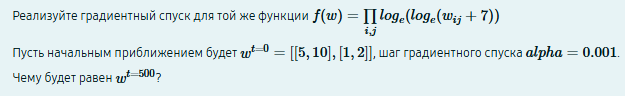

In [5]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)

alpha = 0.001

for _ in range(500):
    function = (torch.log(torch.log(w + 7))).prod()
    function.backward()
    w.data -= alpha * w.grad.data
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


**Задание 4.**

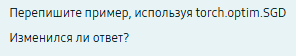

In [8]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)

optimizer = torch.optim.SGD([w], lr=0.001)

for _ in range(500):
    function = (torch.log(torch.log(w + 7))).prod()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [9]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

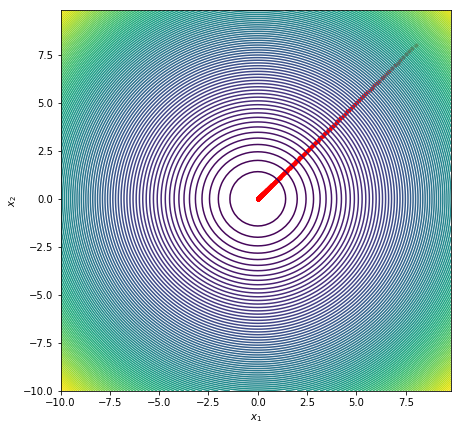

**Задание 5.**

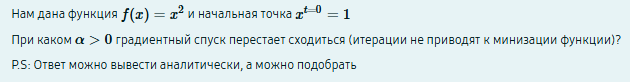

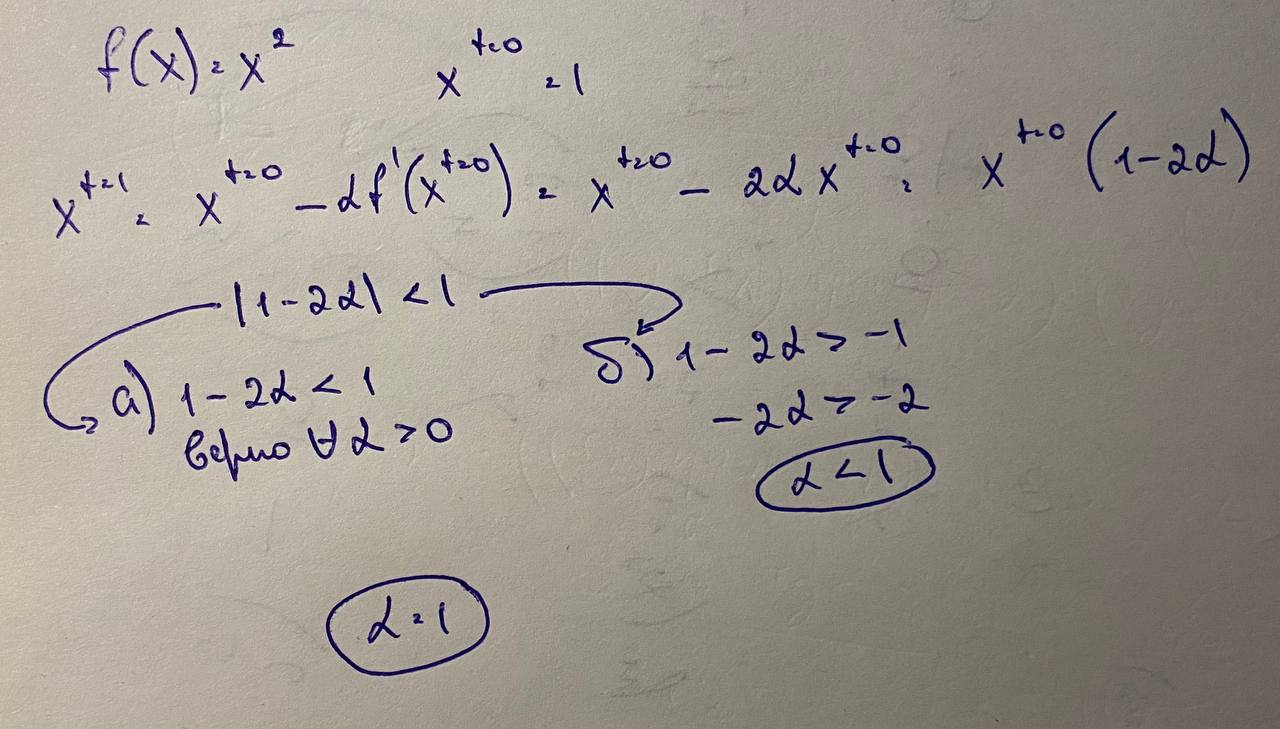